**Part 1: Pandas**
In this section we will learn how to create Pandas dataframes, filter them and sort them to find specific subsets of our data
       
**Part 2: Matplotlib**
In this section we will learn how to create Basic Matplotlib plots to visualize data that we're interested in. These will include line graphs, bar charts, and scatter plots.
      

# Part 1: Pandas

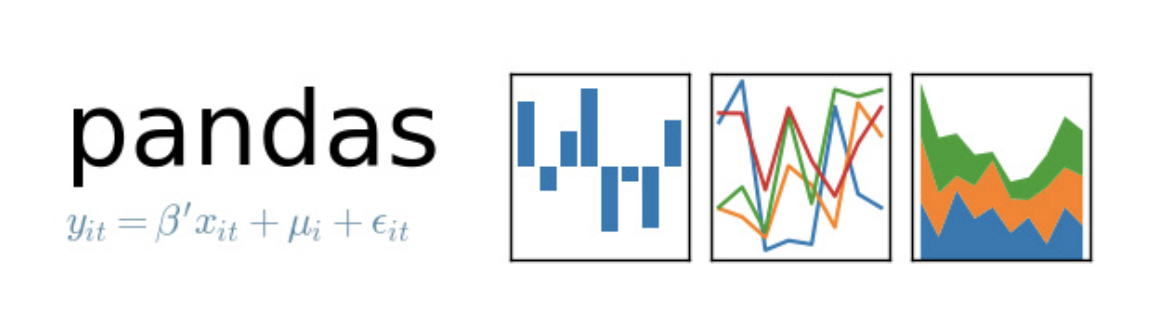

The **Pandas Library** is a fast, powerful, and flexible library used for data manipulation and analysis.

In [ ]:
# Import Pandas Library
import pandas as pd

## The DataFrame

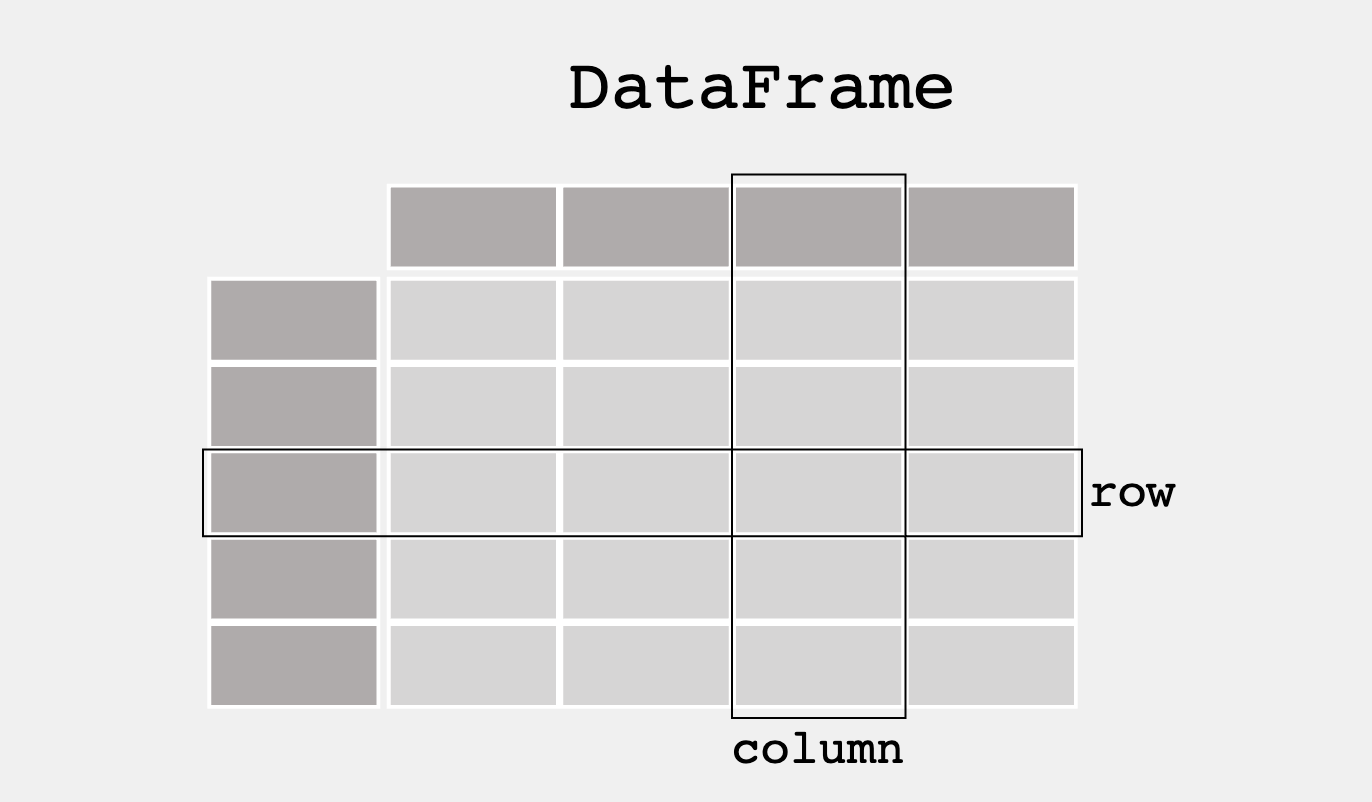

Pandas is built around a **data structure called a "Dataframe"**. It's basically just a table.

Pandas defines its DataFrame variable as a dictionary of lists.

In [ ]:
dataframe_1 = pd.DataFrame(
    {"Column 1": ["Cell 1", "Cell 3"],
     "Column 2": ["Cell 2", "Cell 4"]
     }
)

dataframe_1

### 💻 Exercise

Based on the previous cell - define and display a Pandas Dataframe that looks like this 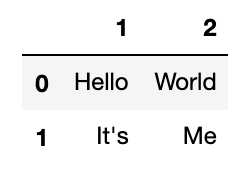

In [ ]:
#Write your code here:


## Importing

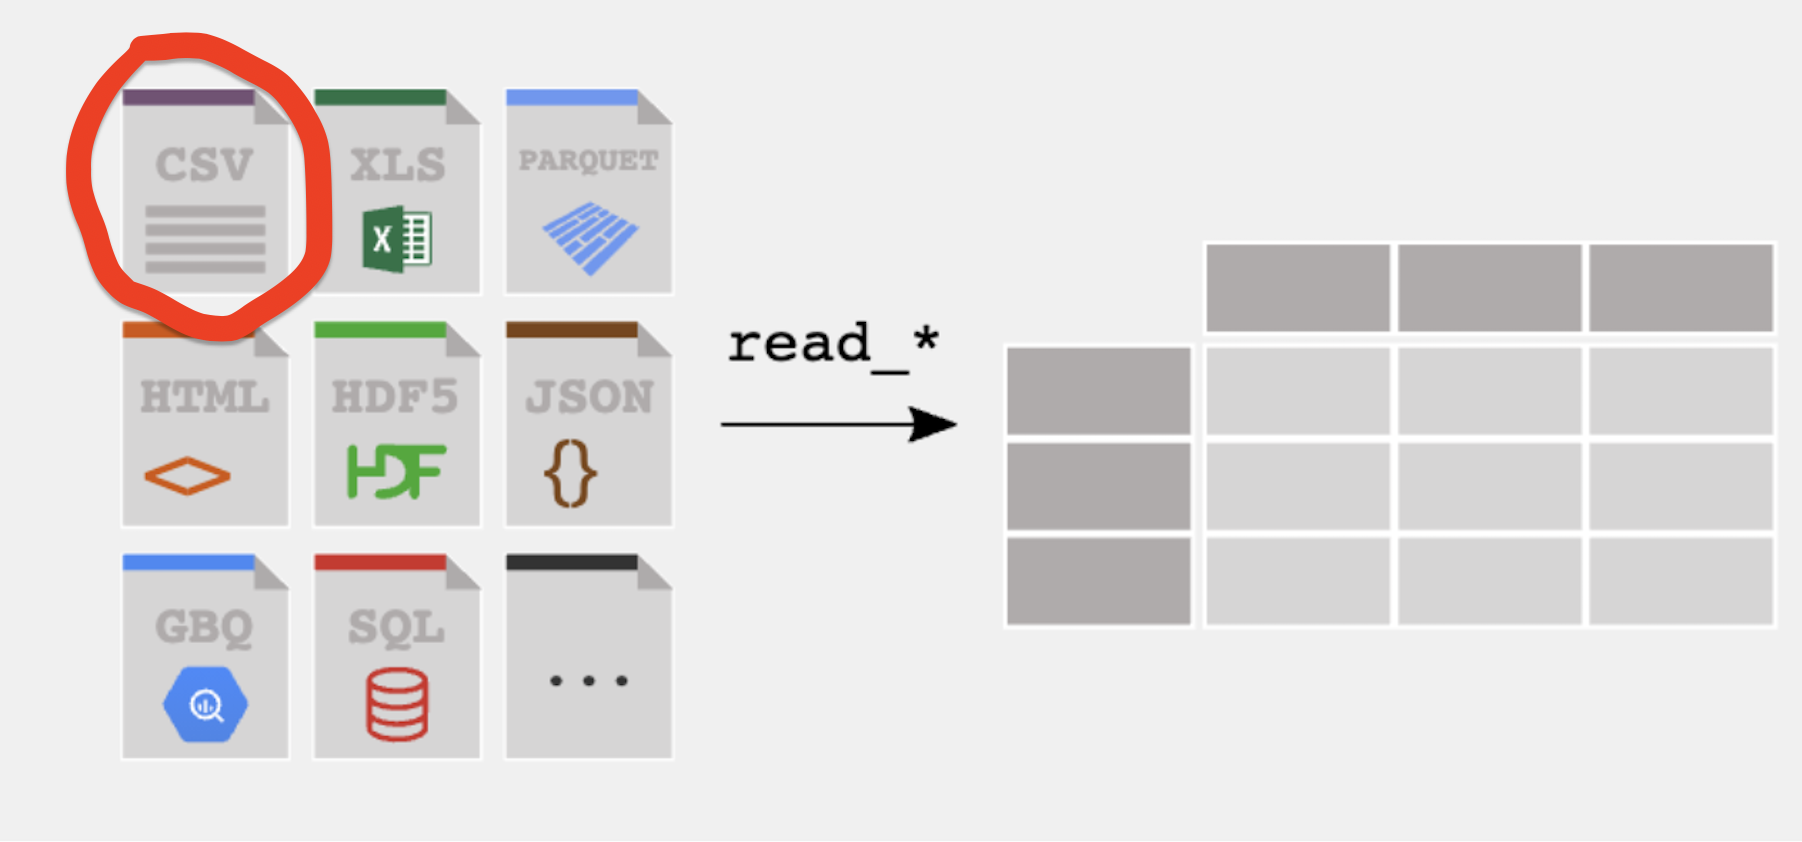

**The Pandas `read_csv()` function takes a path input and returns a Pandas Dataframe.**

Why is the does the path have "data_files/" before the name of the file?

In [ ]:
# save path of csv file 
movie_path = "data_files/movie_scores.csv"

# create dataframe from csv file
movie_df = pd.read_csv(movie_path)

To **display only the first 5 rows let's use the pandas function `.head()`**

In [ ]:
first_five_df = movie_df.head()
first_five_df

**To display a different number of rows use an integer as an arguement**

In [ ]:
movie_df.head(2)

### 💻 Exercise

Display the first 7 rows of the movie DataFrame below:

In [ ]:
#Write your code here:


**To display  at specific columns** we use the the syntax shown below.

In [ ]:
RT_rating_only = movie_df[["FILM","RottenTomatoes"]]
RT_rating_only.head(5)

### 💻 Exercise: Create a dataframe that looks like this 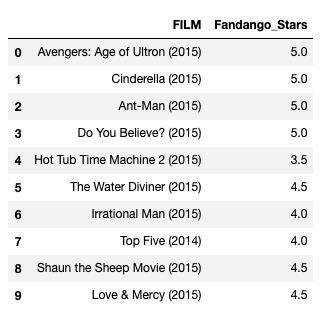

In [ ]:
# Write your code here


## Filtering

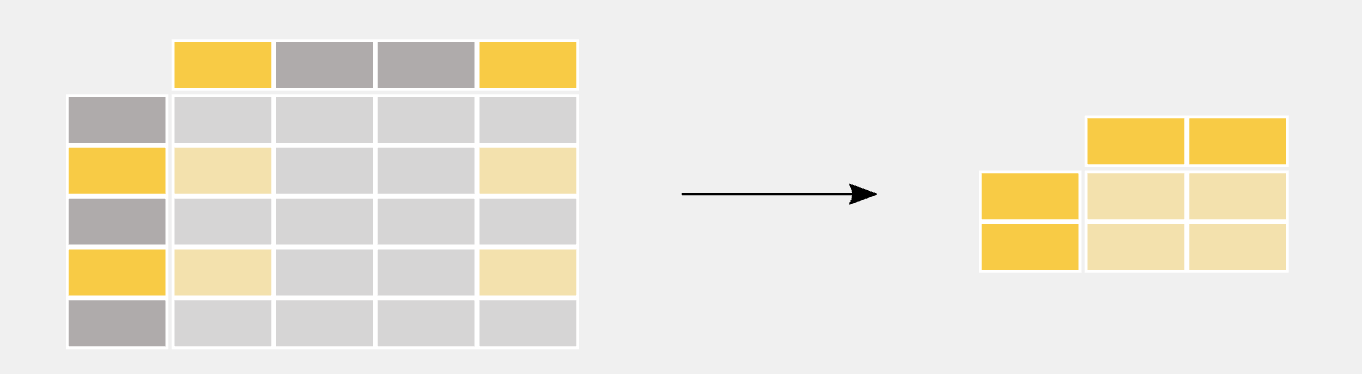

If we have a question that only applies to some of our data it can be useful to filter our DataFrame.

For example, if we're trying to pick a movie to watch, and we typically agree with how rotten tomatoes rates movies, we might choose to filter our movie dataset so that we only see movies with a rotten tomatoes score above 90%

**To filter we use the `loc[]` function**

However, **before we use the filter function we need to specify what column we will be filtering from.**

We do this by **setting the "FILM" column as our index**

In [ ]:
movie_df = movie_df.set_index("FILM")
movie_df.head()

Now we can filter to **view a specific value** by using this syntax

In [ ]:
movie_df.loc["Ant-Man (2015)", "Metacritic"]

In [ ]:
movie_df.loc["Do You Believe? (2015)", "Fandango_Stars"]

### 💻 Exercise: Find the Rotten Tomatoes score for "Avengers: Age of Ultron (2015)" using .loc[ ]

In [ ]:
# Write your code here


To go one step further, **we can add conditionals to `loc[]` operations using this syntax.**

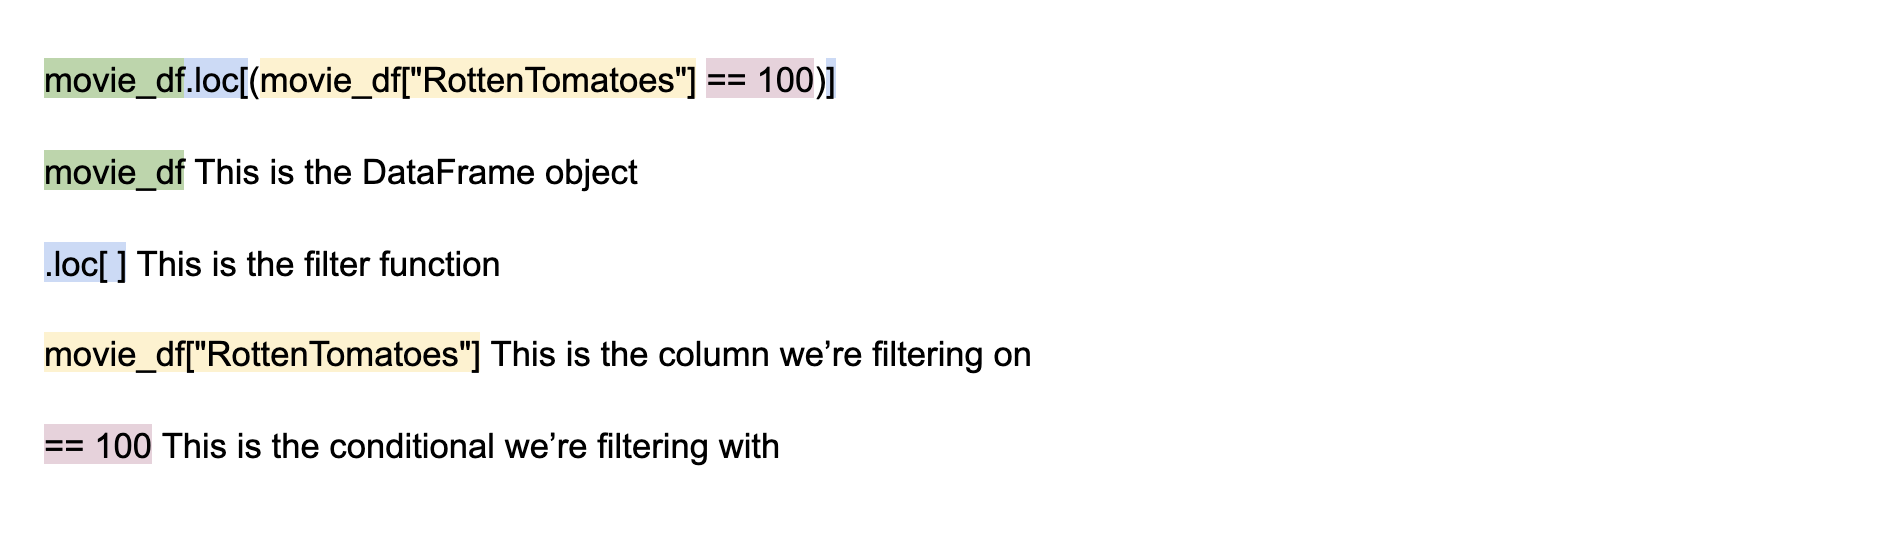

What do you expect the code below to output?

In [ ]:
movie_df.loc[(movie_df["RottenTomatoes"] == 100)]

### **💻 Exercise: Output movies with a IMDB rating of less than 5**

In [ ]:
#Write your code here:


You can also use **multiple conditionals by using this syntax for "or"**

In [ ]:
movie_df.loc[(movie_df["RottenTomatoes"] == 100) | (
    movie_df["Metacritic"] > 93)]

...and **this syntax for "and"**

In [ ]:
movie_df.loc[(movie_df["RottenTomatoes"] == 100)].loc[(movie_df["Metacritic"] == 90)]

### 💻 Exercise: Output a list of movies that got greater than 98 on Rotten Tomatoes and greater than 90 on Metacritic

In [ ]:
#Write your code here:


## Summary Functions (Max, Min, Mean, Count, Sum)

In the previous lab, we wrote algorithms to calculate summary statistics. Now, we can use Pandas to calculate summary statics on dataframes. 

**`.max()` will return the maximum value in a column**

In [ ]:
# Find maximum value for Rotten Tomatoe scores
max_rt_val = movie_df["RottenTomatoes"].max()
print(max_rt_val)

**To find the movie with the max Rotten Tomtatoes score, we can use the `loc` function.** 

In [ ]:
# Find movies with maximum Rotten Tomatoe score
movie_df.loc[movie_df["RottenTomatoes"] == max_rt_val]

**`.min()` will return the minimum value in a column**

In [ ]:
# Find minimum value for Rotten Tomatoe scores
min_rt_val = movie_df["RottenTomatoes"].min()
print(min_rt_val)

# Find movies with minimum Rotten Tomatoe score
movie_df.loc[movie_df["RottenTomatoes"] == min_rt_val]

**`.mean()` will return the mean value of a column**

In [ ]:
# Find mean value for Rotten Tomatoe scores
mean_rt_val = int(movie_df["RottenTomatoes"].mean())
print(mean_rt_val)

# Find movies with mean Rotten Tomatoe score
movie_df.loc[movie_df["RottenTomatoes"] == mean_rt_val]


**`.count()` will return the number of cells in a column**

In [ ]:
movie_df["RottenTomatoes"].count()

**`.sum()` will return the sum of cells in a column**

In [ ]:
movie_df["RottenTomatoes"].sum()

### 💻 Exercise: Find the movies with maximum IMDB rating

In [ ]:
#Write your code here:


## Advanced Chaining

The summary functions can be chained to things that you already know!

Take a look at the diagram below to see how chaining works:

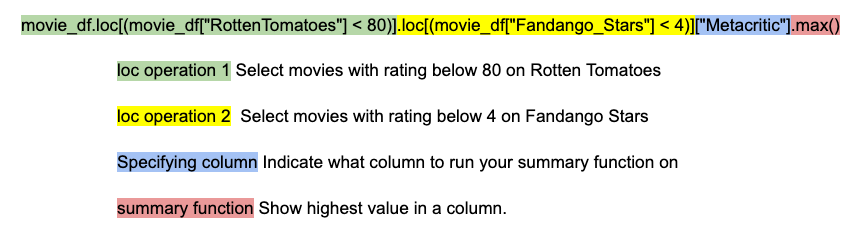

In [ ]:
movie_df.loc[(movie_df["RottenTomatoes"]<80)].loc[(movie_df["Fandango_Stars"]<4)]["Metacritic"].max()

### 💻 Exercise: What is the mean Rotten Tomatoes score for movies with a Metacritic score of over 85?

In [ ]:
#Write your code here:


### 💻 Exercise: What is the mean IMDB score for movies with a Metacritic score above average?

*Hint: You'll probably want to break this into two parts.*

In [ ]:
#Write your code here:


# Part 2: Matplotlib

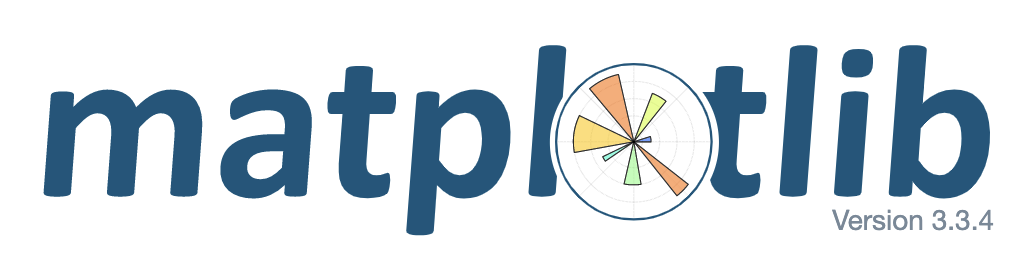

Organizing and filtering data is useful - but its not the whole picture! In this section we will cover how to **visualize data in a number of ways.**

In this section, **we will be analzying ISF weather data from January 2021.**

Lets start by importing everything we need...

In [ ]:
# Import Matplotlib 
import matplotlib.pyplot as plt

# Import dataset
weather_path = "data_files/weather_data.csv"
weather_df = pd.read_csv(weather_path)
weather_df.Time = pd.to_datetime(weather_df.Time) #convert the Time data to a special date type

# Display dataset
weather_df.head(5)

## Plot syntax

All of the plots provided by matplotlib have similar syntax

It looks like this:

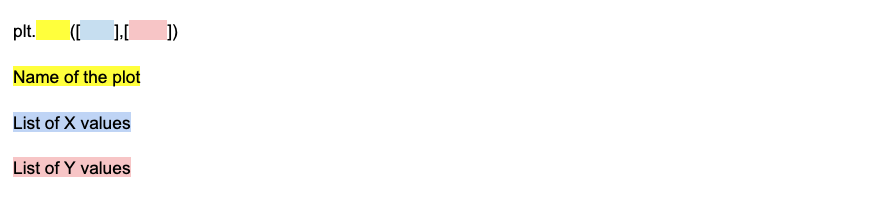

## Line plots

This type of plot is great for comparing two variables, or looking at how a variable changes over time.

For example, what if we were trying to answer the question: **How did the tempeture change over the course of the month?** 

To plot temperature over time we use this syntax:

In [ ]:
plt.plot(weather_df["Time"],weather_df["Temperature"])  

# Adds a label to the x-axis
plt.xlabel('Time')

# Rotate the x-axis labels
plt.xticks(rotation=45)

# Adds a title to the y-axis
plt.ylabel('Temperaature')

# To add a title to the entire plot
plt.title('Temperture Change Over Time')

# Displays Plot
plt.show()

### 💻 Exercise

Create a plot to visualize the follow question: **How did the humidity change over the course of the month?**

In [ ]:
#Write your code here


## Bar charts

Bar charts are great for looking at categorical data.

In [ ]:
weather_df.head()

Let's take a look at the average level of pollutants on each of these days

For example, what if we were trying to answer the question: **What was the average level of composition of pollutants in January 2021?** 

In [ ]:
# First, we must find the averages for each pollutant. 

NO_average = weather_df["NO"].mean()
NO2_average = weather_df["NO2"].mean()
CO_average = weather_df["CO"].mean()
O3_average = weather_df["O3"].mean()
SO2_average = weather_df["SO2"].mean()

pollutant_names = ["NO","NO2","CO","O3","SO2"]
pollutant_means = [NO_average, NO2_average, CO_average, O3_average, SO2_average]

In [ ]:
# Using the averages, we can great a bar graph. 

plt.bar(pollutant_names,pollutant_means)

# Adds a label to the x-axis
plt.xlabel('Pollutants')

# Adds a title to the y-axis
plt.ylabel('Level')

# To add a title to the plot
plt.title('Average Level of Each Pollutant')

# Displays Plot
plt.show()

### 💻Exercise

Create the same barchart but instead of showing the average level of each pollutant, show the maximum level.

Create a plot to visualize the question: **What was the maximum level of each pollutant in January 2021?**

*Hint: copy and paste is your friend!*

In [ ]:
#Write your code here


## Scatter plots

A scatter plot is great for looking at relationships between variables. 

For example, what if we were trying to answer the question: **Do temperature levels correlate with humidity levels?** 

In [ ]:
plt.scatter(weather_df["Temperature"],weather_df["Humidity"])
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Relationship Between Temperature and Humidity')

plt.show()

### 💻Exercise

Create a plot to visualize the question: **Do temperature levels correlatae with solar radiation levels?**


In [ ]:
#Write your code here


## Pie Charts

A pie chart is great for looking at the composition of data. 

For example, what if we were trying to answer the question: **What is the distribution of pollutants?** 

In [ ]:
pollutant_names = ["NO","NO2","CO","O3","SO2"]
pollutant_means = [NO_average, NO2_average, CO_average, O3_average, SO2_average]

plt.pie(pollutant_means,            # sets data
        labels = pollutant_names,   # sets labels
        autopct='%1.1f%%')          # displays values

plt.show()

### 💻Exercise

Create a pie chart to show the distribution of days where the temperature was in the following bands:

- <10ºC
- 10-15ºC
- 15-20ºC
- 20-25ºC
- \≥ 25ºC

*Hint: You'll need to combine your pandas filtering skills with your matplotlib plotting skills to figure this one out!*

In [ ]:
#Write your code here


# Part 3: Extension

Take a look at what's possible with Matplotlib: https://matplotlib.org/stable/gallery/index.html

💻 **Create a visualization of your choice below**:

In [ ]:
#Write your code here
